Dataset Keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Shape of data (features): (1797, 64)
Shape of target: (1797,)


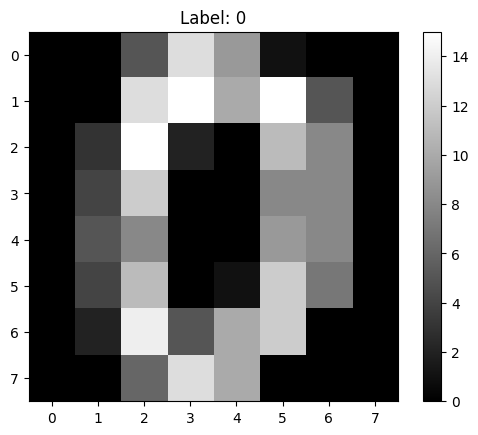

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Print dataset keys to understand its structure
print("Dataset Keys:", digits.keys())

# Check the shape of data (number of samples and features)
print("Shape of data (features):", digits.data.shape)

# Check the shape of target labels (number of samples)
print("Shape of target:", digits.target.shape)

# Display the first image and its label
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.colorbar()
plt.show()


In [2]:
import numpy as np

# Check for missing values
missing_values = np.isnan(digits.data).sum()
print(f"Missing values in data: {missing_values}")

# Check for duplicate rows
duplicates = len(digits.data) - len(np.unique(digits.data, axis=0))
print(f"Duplicate rows in data: {duplicates}")


Missing values in data: 0
Duplicate rows in data: 0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the feature matrix
scaler = StandardScaler()
data_normalized = scaler.fit_transform(digits.data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_normalized, digits.target, test_size=0.2, random_state=42
)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1437, 64)
Test set shape: (360, 64)


In [4]:
from sklearn.decomposition import PCA

# Apply PCA and retain 95% of variance
pca = PCA(n_components=0.95)  # Retains 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the new shape of the data
print("Original shape of data:", X_train.shape)
print("Reduced shape of data after PCA:", X_train_pca.shape)


Original shape of data: (1437, 64)
Reduced shape of data after PCA: (1437, 40)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model on the PCA-transformed training data
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on test set: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      0.97      0.97        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.93      0.92        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Extract only the features (digits.data) and scale them
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)

# Compute the covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)  # rowvar=False means columns represent features

# Print the covariance matrix
print("Covariance Matrix:\n", cov_matrix)

# Compute the minimum covariance value
min_cov = np.min(cov_matrix)
print("Minimum Covariance:", min_cov)


Covariance Matrix:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]
Minimum Covariance: -0.57051363323811


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract only the features and scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)

# Apply PCA to compute the eigenvalues
pca = PCA()
pca.fit(scaled_data)

# Get the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Print the number of eigenvalues
print("Number of eigenvalues:", len(eigenvalues))


Number of eigenvalues: 64


In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract only the features and scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)

# Apply PCA to compute the eigenvalues and eigenvectors
pca = PCA()
pca.fit(scaled_data)

# Get the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Find the maximum cumulative explained variance
max_cumulative_variance = cumulative_variance[-1]

# Print the cumulative variance and the maximum explained variance
print("Cumulative explained variance:", cumulative_variance)
print("Maximum cumulative explained variance:", max_cumulative_variance)

# Determine the number of components to reach a high cumulative explained variance (e.g., 90%)
components_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components explaining 90% variance: {components_90_variance}")


Cumulative explained variance: [0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755 0.61655561 0.64232616
 0.66507919 0.68735099 0.70900328 0.72814495 0.74590042 0.76228111
 0.77824572 0.79313763 0.80661732 0.81933664 0.83099501 0.84157148
 0.85132464 0.86077023 0.86940036 0.87776679 0.88574372 0.89320844
 0.90046426 0.90738337 0.91392246 0.92033038 0.92624422 0.93195585
 0.93719222 0.94201029 0.94654748 0.95077911 0.95483964 0.95881049
 0.96237542 0.9657833  0.96906165 0.97217197 0.97505772 0.97782262
 0.98041436 0.98275919 0.98494176 0.98697774 0.98893286 0.99076605
 0.99244551 0.99405787 0.9955355  0.99688668 0.99813769 0.99917465
 1.         1.         1.         1.        ]
Maximum cumulative explained variance: 0.9999999999999997
Number of components explaining 90% variance: 31


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract only the features and scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)

# Apply PCA to the scaled data
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the maximum explained variance ratio
max_explained_variance_ratio = np.max(explained_variance_ratio)
print("Maximum explained variance ratio:", max_explained_variance_ratio)


Maximum explained variance ratio: 0.12033916097734901


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


Saving GYM.csv to GYM.csv


In [13]:
# Check the uploaded files
print(uploaded)


{'GYM.csv': b'number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour\r\n37,4,0,0,71.76,0,0,8,17\r\n45,4,0,0,71.76,0,0,8,17\r\n40,4,0,0,71.76,0,0,8,17\r\n44,4,0,0,71.76,0,0,8,17\r\n45,4,0,0,71.76,0,0,8,17\r\n46,4,0,0,72.15,0,0,8,18\r\n43,4,0,0,72.15,0,0,8,18\r\n53,4,0,0,72.15,0,0,8,18\r\n54,4,0,0,72.15,0,0,8,18\r\n43,4,0,0,72.15,0,0,8,18\r\n39,4,0,0,69.97,0,0,8,19\r\n38,4,0,0,69.97,0,0,8,19\r\n45,4,0,0,69.97,0,0,8,19\r\n41,4,0,0,69.97,0,0,8,19\r\n36,4,0,0,69.97,0,0,8,19\r\n42,4,0,0,68.8,0,0,8,20\r\n35,4,0,0,68.8,0,0,8,20\r\n36,4,0,0,68.8,0,0,8,20\r\n48,4,0,0,68.8,0,0,8,20\r\n40,4,0,0,68.8,0,0,8,20\r\n49,4,0,0,68.04,0,0,8,21\r\n37,4,0,0,68.04,0,0,8,21\r\n48,4,0,0,68.04,0,0,8,21\r\n45,4,0,0,68.04,0,0,8,21\r\n45,4,0,0,68.04,0,0,8,21\r\n38,4,0,0,67.55,0,0,8,22\r\n41,4,0,0,67.55,0,0,8,22\r\n41,4,0,0,67.55,0,0,8,22\r\n37,4,0,0,67.55,0,0,8,22\r\n33,4,0,0,67.55,0,0,8,22\r\n22,4,0,0,67,0,0,8,23\r\n2,4,0,0,67,0,0,8,23\r\n1,4,0,0,67,0,0,8,23\

In [15]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('GYM.csv')

# Check the first few rows of the dataset
df.head()



,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


In [16]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if needed (for example, by filling with the mean)
df.fillna(df.mean(), inplace=True)


number_people           0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64


In [17]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, display the duplicate rows
print("Duplicate rows:")
print(df[duplicates])


Number of duplicate rows: 14218
Duplicate rows:
       number_people  day_of_week  is_weekend  is_holiday  temperature  \
4                 45            4           0           0        71.76   
9                 43            4           0           0        72.15   
24                45            4           0           0        68.04   
27                41            4           0           0        67.55   
34                 0            4           0           0        67.00   
...              ...          ...         ...         ...          ...   
62162             30            5           1           0        65.66   
62172             23            5           1           0        61.52   
62173             23            5           1           0        61.52   
62174             19            5           1           0        61.52   
62180             21            5           1           0        61.07   

       is_start_of_semester  is_during_semester  month  hour  


In [18]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify that duplicates are removed
print(f"Data shape after removing duplicates: {df_cleaned.shape}")


Data shape after removing duplicates: (47966, 9)


In [19]:
# Extract the features (dropping 'number_people' column, assuming it's the target)
features = df_cleaned.drop(columns=['number_people'])

# Check the first few rows of the features dataframe
print(features.head())


   day_of_week  is_weekend  is_holiday  temperature  is_start_of_semester  \
0            4           0           0        71.76                     0   
1            4           0           0        71.76                     0   
2            4           0           0        71.76                     0   
3            4           0           0        71.76                     0   
5            4           0           0        72.15                     0   

   is_during_semester  month  hour  
0                   0      8    17  
1                   0      8    17  
2                   0      8    17  
3                   0      8    17  
5                   0      8    18  


In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Check the shape of the scaled data
print(f"Scaled data shape: {scaled_data.shape}")


Scaled data shape: (47966, 8)


In [21]:
from sklearn.decomposition import PCA

# Apply PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# Check the shape of the transformed data
print(f"Shape of the data after PCA: {pca_data.shape}")


Shape of the data after PCA: (47966, 7)


In [22]:
# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")


Explained variance ratio: [0.22478347 0.16687456 0.14587681 0.13268236 0.11641974 0.10110006
 0.08501651]


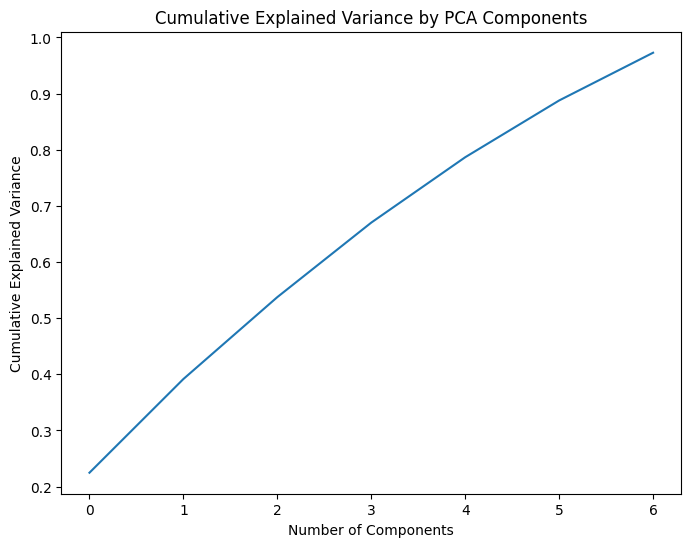

In [23]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()


In [24]:
# Get the number of principal components
num_components = pca.n_components_
print(f"Number of components selected: {num_components}")


Number of components selected: 7


In [25]:
# Get the principal components
components = pca.components_
print(f"Principal components (Eigenvectors):\n{components}")


Principal components (Eigenvectors):
[[ 0.69763022  0.69754848 -0.08633439  0.08931131 -0.01443298 -0.01523243
   0.02860637  0.10024666]
 [-0.05516867 -0.07228022 -0.29374699  0.54212067  0.38577763  0.58081104
   0.28191656  0.21425937]
 [ 0.05025435  0.05010134  0.23403663 -0.15434455  0.66562967  0.17149666
  -0.66454063 -0.04775732]
 [-0.07895519 -0.03286483  0.36685729  0.34163602 -0.1022299  -0.27573566
  -0.18870749  0.78695293]
 [ 0.04732251  0.07331019  0.83518168 -0.0236435  -0.02025156  0.34235731
   0.38835349 -0.16081562]
 [-0.01696666  0.01458908  0.1344724   0.69618935  0.1357402  -0.45172717
  -0.05772789 -0.5205012 ]
 [-0.01431994  0.00430653 -0.01240564 -0.26849812  0.61531351 -0.4848
   0.5369518   0.1599133 ]]


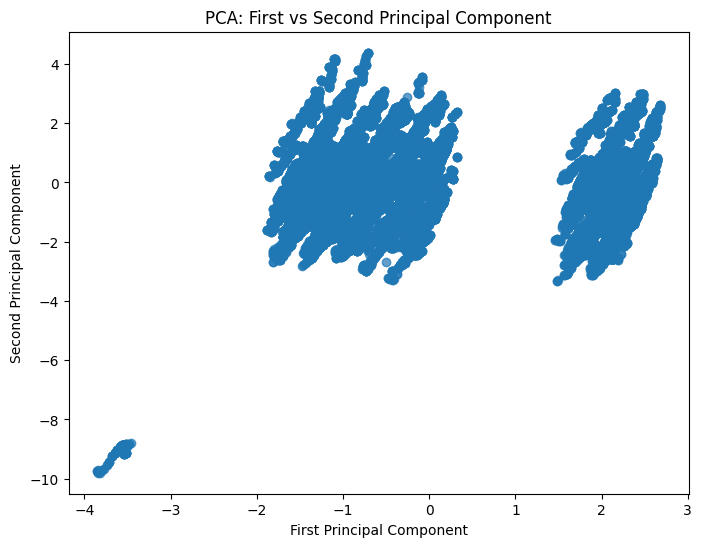

In [26]:
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First vs Second Principal Component')
plt.show()


In [27]:
# Reconstruct the original data from the PCA components
reconstructed_data = pca.inverse_transform(pca_data)

# Print the reconstructed data
print(f"Reconstructed Data:\n{reconstructed_data[:5]}")


Reconstructed Data:
[[-0.07374167  0.03294308 -0.07311317  2.02969142 -0.30885256 -1.48105446
   0.19595657  0.59458586]
 [-0.07374167  0.03294308 -0.07311317  2.02969142 -0.30885256 -1.48105446
   0.19595657  0.59458586]
 [-0.07374167  0.03294308 -0.07311317  2.02969142 -0.30885256 -1.48105446
   0.19595657  0.59458586]
 [-0.07374167  0.03294308 -0.07311317  2.02969142 -0.30885256 -1.48105446
   0.19595657  0.59458586]
 [-0.07565613  0.03485799 -0.07320456  2.0928487  -0.30885986 -1.48098334
   0.19594726  0.75384799]]


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 2. Apply PCA and retain 99% of the variance
pca = PCA(n_components=0.99)
pca.fit(scaled_data)

# 3. Check the number of components
num_components = pca.n_components_
print(f"Minimum number of components required to retain 99% variance: {num_components}")


Minimum number of components required to retain 99% variance: 9


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df is your dataframe
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA with n_components=2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 3: Reconstruct the original data (approx.)
reconstructed_data = pca.inverse_transform(pca_data)

# Step 4: Calculate variance of all columns before and after PCA
original_variance = np.var(scaled_data, axis=0).sum()
reconstructed_variance = np.var(reconstructed_data, axis=0).sum()

# Step 5: Calculate the difference in sum of variance
variance_difference = original_variance - reconstructed_variance
print(variance_difference)


5.218483137987504


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Select independent features (assuming all columns except 'number_people' are independent features)
independent_features = df_cleaned.drop(columns=['number_people'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_df_cleaned = scaler.fit_transform(independent_features)

# Step 2: Compute covariance matrix
cov_matrix = np.cov(scaled_df_cleaned.T)

# Step 3: Calculate eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sum the first 8 eigenvalues
sum_of_eigenvalues = np.sum(eigenvalues[:8])
print(f"Sum of eigenvalues for the first 8 records: {sum_of_eigenvalues}")


Sum of eigenvalues for the first 8 records: 8.000166788283124


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('GYM.csv')

# Select independent features and target variable
X = data.drop(columns=['number_people'])  # Features
y = data['number_people']  # Target

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Model 1: Raw Data (no preprocessing)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Predictions and RMSE for Model 1
y_pred_1 = model_1.predict(X_test)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))

# Model 2: PCA-based Data
# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA with n_components=4
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Train Linear Regression model on PCA-transformed data
model_2 = LinearRegression()
model_2.fit(X_train_pca, y_train)

# Predictions and RMSE for Model 2
y_pred_2 = model_2.predict(X_test_pca)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))

# Print the RMSE of both models
print(f"RMSE for Model 1 (Raw Data): {rmse_1}")
print(f"RMSE for Model 2 (PCA-based): {rmse_2}")

# Compare the performance
if rmse_2 < rmse_1:
    print("Model 2 performance is better than Model 1")
elif rmse_2 == rmse_1:
    print("No change in performance")
else:
    print("Model 2 performance is not better than Model 1")


RMSE for Model 1 (Raw Data): 15.789221346622114
RMSE for Model 2 (PCA-based): 16.328858970061926
Model 2 performance is not better than Model 1


In [36]:
corr_matrix = data.corr()


In [37]:
min_correlation = corr_matrix.min().min()
print("Minimum Correlation: ", min_correlation)


Minimum Correlation:  -0.1739578122762517


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("GYM.csv")

# Define the independent and dependent variables
X = data.drop('number_people', axis=1)  # Independent features
y = data['number_people']  # Dependent feature (target)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Model 1 - Linear Regression with Raw Data
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Make predictions for Model 1
y_pred_1 = model_1.predict(X_test)

# Calculate RMSE for Model 1
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))
print("RMSE for Model 1 (Raw Data):", rmse_1)

# Model 2 - Linear Regression with StandardScaler and PCA
# Step 1: Apply StandardScaler to the independent features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA with n_components=4
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit the Linear Regression model on PCA-transformed data
model_2 = LinearRegression()
model_2.fit(X_train_pca, y_train)

# Make predictions for Model 2
y_pred_2 = model_2.predict(X_test_pca)

# Calculate RMSE for Model 2
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
print("RMSE for Model 2 (StandardScaler & PCA-based):", rmse_2)

# Compare the performance of both models
if rmse_2 < rmse_1:
    print("Model 2 performance is better than Model 1")
elif rmse_2 == rmse_1:
    print("No change in performance")
else:
    print("Model 2 performance is not better than Model 1")


RMSE for Model 1 (Raw Data): 15.789221346622114
RMSE for Model 2 (StandardScaler & PCA-based): 16.328858970061926
Model 2 performance is not better than Model 1
